## DS 862 Machine Learning for Business Analysts Fall 2020

### Support Vector Machine

#### Submitted by:
* Di Wang

For this assignment we will use the customer churning dataset again and build a classifier for that. The data set is obtained from Kaggle [here](https://www.kaggle.com/blastchar/telco-customer-churn). The goal is to predict whether a customer will churn (i.e. leave) given a set of predictors. 

In [1]:
#import library for this assignment
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import warnings # Suppress warnings because they are annoying
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
data = pd.read_csv('churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


I will do the cleanup for you.

In [3]:
# Remove columns
data.drop(['customerID', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'], axis = 1, inplace = True)

# Create dummy variables
data = pd.get_dummies(data = data, columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'TechSupport', 'StreamingTV', 'Contract'], drop_first = True)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,No,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,No,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,2,53.85,108.15,Yes,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1840.75,No,1,0,0,0,1,0,0,0,0,1,0,0,1,0
4,0,2,70.70,151.65,Yes,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [4]:
X = data.drop('Churn', axis = 1)
y = data.Churn

Your task for this assignment is simple. First split your data into 80%-20%. Train a SVM with linear Kernel and investigate your classification error on the test set. Be sure to apply any appropriate preprocessing steps, and tune your model.

In [5]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [6]:
# Classifier - Linear SVM

from sklearn.svm import SVC 

pipeline1 = Pipeline([
                    ('scalar', StandardScaler()),
                    ('linear_svc', SVC(kernel="linear", random_state = 123))
                    ])
parameters1 = [
      {
        'linear_svc__C':[0.01, 0.1, 1, 10, 100],
        'linear_svc__gamma':[0.1, 1, 10] 
        #The higher the gamma value it tries to exactly fit the training data set
      }
]
Model1 = RandomizedSearchCV(pipeline1, parameters1, n_jobs = -1, cv=5)

In [7]:
Model1.fit(X_train, y_train)
print(Model1.best_params_)

{'linear_svc__gamma': 0.1, 'linear_svc__C': 10}


In [8]:
# classification error on test set
np.mean(Model1.predict(X_test) != y_test)

0.20540156361051884

Result:

* The best parameters we use for Linear Kernel is gamma=0.1 and C=10. The misclassification rate will be around 20.54%.

Now try different polynomial and rbf kernels. See if you can improve your test error. Make sure you set seed to create reproducible results.

In [9]:
# Polynomial

pipeline2 = Pipeline([
                    ('scalar', StandardScaler()),
                    ('poly_svc', SVC(kernel="poly", random_state = 123))
                    ])
parameters2 = [
      {
        'poly_svc__C':[0.1, 1, 10],
        'poly_svc__degree':[1,2,3,4]
        #degree is a parameter used when kernel is set to ‘poly’
      }
]
Model2 = RandomizedSearchCV(pipeline2, parameters2, n_jobs = -1, cv=5)

In [10]:
Model2.fit(X_train, y_train)
print(Model2.best_params_)

{'poly_svc__degree': 3, 'poly_svc__C': 1}


In [11]:
# classification error on test set
np.mean(Model2.predict(X_test) != y_test)

0.19900497512437812

In [12]:
# RBF

pipeline3 = Pipeline([
                    ('scalar', StandardScaler()),
                    ('rbf_svc', SVC(kernel="rbf", random_state = 123))
                    ])
parameters3 = [
      {
        'rbf_svc__C':[0.01, 0.1, 1, 10, 100],
        'rbf_svc__gamma':[0.1, 1, 10]
      }
]
Model3 = RandomizedSearchCV(pipeline3, parameters3, n_jobs = -1, cv=5)

In [13]:
Model3.fit(X_train, y_train)
print(Model3.best_params_)

{'rbf_svc__gamma': 0.1, 'rbf_svc__C': 1}


In [14]:
# classification error on test set
np.mean(Model3.predict(X_test) != y_test)

0.19758351101634683

In [15]:
# let's create a confusion matrix plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

          No       0.82      0.93      0.87       996
         Yes       0.74      0.50      0.60       411

    accuracy                           0.80      1407
   macro avg       0.78      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



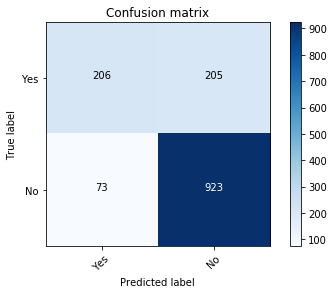

In [16]:
cnf_matrix = confusion_matrix(y_test, Model3.predict(X_test), labels=['Yes', 'No'])
np.set_printoptions(precision=2)

print (classification_report(y_test, Model3.predict(X_test)))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

Result:

* The best parameters we use for Polynomial Kernel is degree=3 and C=1. The misclassification rate will be around 19.90%.
* The best parameters we use for RBF Kernel is gamma=0.1 and C=1. The misclassification rate will be around 19.76%.

Looks like that there are more customers who decide to leave Telco. Totally, our model predicts 206 customers whose Churn will be yes and the true value is yes, and predicts 923 customers whose Churn will be No and the true value is no.

As a practice, fit a regularized logistic regression on this data set as well, and see if you can achieve a better test error.

In [17]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

pipeline4 = Pipeline([
    ("log_reg", LogisticRegression(solver="newton-cg"))
])
parameters4 = [{ "log_reg__C": [0.1, 1, 5, 10]}]
Model4 = RandomizedSearchCV(pipeline4, parameters4, n_jobs = -1, cv = 5)

In [18]:
Model4.fit(X_train, y_train)
print(Model4.best_params_)

{'log_reg__C': 5}


In [19]:
# classification error on test set
np.mean(Model4.predict(X_test) != y_test)

0.18834399431414356

              precision    recall  f1-score   support

          No       0.83      0.92      0.87       996
         Yes       0.74      0.55      0.63       411

    accuracy                           0.81      1407
   macro avg       0.78      0.74      0.75      1407
weighted avg       0.80      0.81      0.80      1407



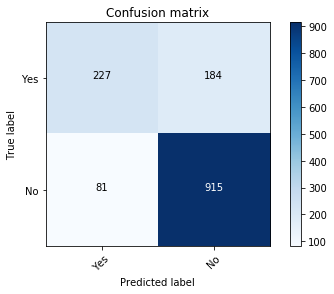

In [20]:
cnf_matrix = confusion_matrix(y_test, Model4.predict(X_test), labels=['Yes', 'No'])
np.set_printoptions(precision=2)

print (classification_report(y_test, Model4.predict(X_test)))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

Observation: 

When we use the Logistic Regression to build our model, looks like we slightly improve our accuracy rate. Now the misclassification rate is around 18.83%. 

Totally, our model predicts 227 customers whose Churn will be yes and the true value is yes, and predicts 915 customers whose Churn will be No and the true value is no.

### Thank you